Pokemon Classification

## 1. Import inquired liberies

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from pprint import pprint
import math
%matplotlib inline

In [16]:
batch_size = 40
epochs = 50
lr = 0.01
train_ratio = 0.80

## 2. Load data

In [18]:
df=pd.read_csv('train.csv')
X_=pd.concat([pd.read_csv('train.csv').drop(['ID','class','appearedMinute'],axis=1),
             pd.read_csv('test.csv').drop(['id','appearedMinute'],axis=1)],axis=0,ignore_index = False)

Y_=df['class']
Y_.shape

X_.head()
#X_train['terrainType'].plot.hist()

,appearedTimeOfDay,appearedHour,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,...,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151
0,evening,19,13,False,Bangkok,Asia,Clear,27.8,9.00,1008.96,...,False,False,False,False,False,False,False,False,False,False
1,night,5,13,True,New_York,America,Clear,26.1,8.70,1018.96,...,False,False,False,False,False,False,False,False,False,False
2,evening,19,0,True,New_York,America,Clear,24.7,16.82,1023.22,...,False,False,False,False,False,False,False,False,False,False
3,morning,11,0,True,Hobart,Australia,Clear,12.7,13.25,1014.19,...,False,False,False,False,False,False,False,False,False,False
4,evening,18,13,True,Los_Angeles,America,PartlyCloudy,19.1,5.78,1011.36,...,False,False,False,False,False,False,False,False,False,False


import math
tempTime =((((df["appearedHour"] * 60) + df["appearedMinute"])) / 1440)

tempTime.describe()

#type(df_all["appearedTime"])
#print(df_all["appearedTime"])
#df_all["appearedTime"].values.reshape(-1,1).shape

def myCos(x):
    return math.cos(x * math.pi)
df["appearedTime"] = tempTime.apply(myCos)
df.head(5)

In [19]:
X_.describe()

,appearedHour,terrainType,temperature,windSpeed,pressure,population_density,gymDistanceKm,pokestopDistanceKm
count,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000
mean,10.654452,9.720590,23.281008,7.510169,1014.904328,1541.905140,2.987937,0.562947
std,7.152858,4.941831,6.054764,4.617323,5.828866,2230.860698,46.908371,7.479374
min,0.000000,0.000000,4.800000,0.000000,996.330000,0.000000,0.004516,0.000319
25%,4.000000,7.000000,18.500000,3.920000,1010.695000,69.585650,0.178437,0.050817
50%,10.000000,13.000000,23.800000,6.630000,1015.290000,635.549800,0.314365,0.132209
75%,17.000000,13.000000,27.500000,10.010000,1019.290000,1955.863600,0.577406,0.310317
max,23.000000,16.000000,41.200000,56.130000,1034.170000,10000.000000,3859.424664,455.313099


In [20]:
pprint(X_.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8951 entries, 0 to 1790
Columns: 181 entries, appearedTimeOfDay to cooc_151
dtypes: bool(168), float64(6), int64(2), object(5)
memory usage: 2.4+ MB
None


In [21]:
# for u in X_.columns:
#     if X_[u].dtype==bool:
#         X_[u]=X_[u].astype('int')
boo_feats = X_.select_dtypes( include = [ 'bool' ] ).columns
#X_[ boo_feats ] = preprocessing.scale( X_[ boo_feats ] )
pprint(X_[ boo_feats ].head())

   closeToWater  urban  suburban  midurban  rural  gymIn100m  gymIn250m  \
0         False   True      True      True  False      False      False   
1          True  False     False     False   True      False      False   
2          True  False     False     False   True      False       True   
3          True  False     False     False   True      False       True   
4          True   True      True      True  False       True       True   

   gymIn500m  gymIn1000m  gymIn2500m    ...     cooc_142  cooc_143  cooc_144  \
0      False        True        True    ...        False     False     False   
1      False        True        True    ...        False     False     False   
2       True        True        True    ...        False     False     False   
3       True        True        True    ...        False     False     False   
4       True        True        True    ...        False     False     False   

   cooc_145  cooc_146  cooc_147  cooc_148  cooc_149  cooc_150  cooc_

In [22]:
#X_.appearedHour = X_.appearedHour.astype( str )
X_.terrainType = X_.terrainType.astype( str )
X_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8951 entries, 0 to 1790
Columns: 181 entries, appearedTimeOfDay to cooc_151
dtypes: bool(168), float64(6), int64(1), object(6)
memory usage: 2.4+ MB


In [23]:
# normalization helps a bit
from sklearn import preprocessing
num_feats = X_.select_dtypes( exclude = [ 'object','bool' ] ).columns
X_[ num_feats ] = preprocessing.scale( X_[ num_feats ] )
X_[ num_feats ].head()

,appearedHour,temperature,windSpeed,pressure,population_density,gymDistanceKm,pokestopDistanceKm
0,1.166808,0.746395,0.322679,-1.019866,2.007023,-0.052535,-0.056001
1,-0.790561,0.465609,0.257703,0.695830,-0.691209,-0.051650,-0.048699
2,1.166808,0.234373,2.016396,1.426716,-0.691209,-0.059536,-0.065861
3,0.048312,-1.747648,1.243178,-0.122557,-0.633428,-0.059648,-0.074747
4,1.026996,-0.690571,-0.374733,-0.608099,1.186373,-0.062291,-0.065692


In [24]:
X_=pd.get_dummies(X_); X_.head()

,appearedHour,closeToWater,temperature,windSpeed,pressure,population_density,urban,suburban,midurban,rural,...,weather_WindyandFoggy,weather_WindyandPartlyCloudy,weatherIcon_clear-day,weatherIcon_clear-night,weatherIcon_cloudy,weatherIcon_fog,weatherIcon_partly-cloudy-day,weatherIcon_partly-cloudy-night,weatherIcon_rain,weatherIcon_wind
0,1.166808,False,0.746395,0.322679,-1.019866,2.007023,True,True,True,False,...,0,0,1,0,0,0,0,0,0,0
1,-0.790561,True,0.465609,0.257703,0.695830,-0.691209,False,False,False,True,...,0,0,0,1,0,0,0,0,0,0
2,1.166808,True,0.234373,2.016396,1.426716,-0.691209,False,False,False,True,...,0,0,1,0,0,0,0,0,0,0
3,0.048312,True,-1.747648,1.243178,-0.122557,-0.633428,False,False,False,True,...,0,0,0,1,0,0,0,0,0,0
4,1.026996,True,-0.690571,-0.374733,-0.608099,1.186373,True,True,True,False,...,0,0,0,0,0,0,1,0,0,0


In [10]:
#on_hot
y_one_hot = np.zeros((len(Y_), 6))  
y_one_hot[np.arange(len(Y_)), Y_] = 1

y_one_hot.shape

(7160, 6)

In [11]:
X_train = X_[:Y_.shape[0]]
X_train.shape

(7160, 310)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X_train, 
                                                    y_one_hot, 
                                                    test_size=0.1, 
                                                     stratify=Y_,random_state = 40)

In [14]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
print (x_train[0:10])

      appearedHour  closeToWater  temperature  windSpeed  pressure  \
3653     -0.650749          True    -0.806188  -0.838231  1.507354   
1545      1.026996         False     0.696844   2.016396 -2.076734   
2207      0.887184          True    -0.921806   0.974609  0.230876   
4267     -0.650749         False    -1.714615  -0.976848  1.087008   
6135     -0.790561          True    -1.004391   1.784647 -0.258097   
6518     -0.930373         False     0.316957   0.058442  0.328671   
5382     -1.070185          True    -0.954840   0.571755  1.773286   
5150      1.586245          True     0.069204  -0.907540  0.486515   
6507      1.586245          True    -0.112481   0.708206 -0.819129   
1814     -0.790561         False    -1.004391  -0.015198 -1.076484   

      population_density  urban  suburban  midurban  rural        ...         \
3653            0.154347   True      True      True  False        ...          
1545           -0.296358   True      True      True  False        ...

In [14]:
model = tf.keras.Sequential()
model.add(Dropout(0.2,input_shape=(310,)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(6, activation='softmax')) 

print(model.summary())

W0825 16:35:37.604822 20112 deprecation.py:506] From C:\Users\jovih\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 310)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               39808     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 48,454
Trainable params: 48,454
Non-trainable params: 0
____________________________________________________

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=2)
# # 训练
#history = model.fit(train_X, train_y, epochs=300, batch_size=20, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[early_stopping])

model_history = model.fit(x=x_train, y=y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_split=1 - train_ratio
                         ,verbose=2, shuffle=False)

Train on 5155 samples, validate on 1289 samples
Epoch 1/50
5155/5155 - 1s - loss: 1.6946 - acc: 0.2770 - val_loss: 1.4903 - val_acc: 0.4267
Epoch 2/50
5155/5155 - 0s - loss: 1.5169 - acc: 0.3948 - val_loss: 1.3475 - val_acc: 0.4934
Epoch 3/50
5155/5155 - 0s - loss: 1.4262 - acc: 0.4423 - val_loss: 1.2964 - val_acc: 0.5151
Epoch 4/50
5155/5155 - 0s - loss: 1.3859 - acc: 0.4677 - val_loss: 1.2622 - val_acc: 0.5369
Epoch 5/50
5155/5155 - 0s - loss: 1.3414 - acc: 0.4873 - val_loss: 1.2376 - val_acc: 0.5400
Epoch 6/50
5155/5155 - 0s - loss: 1.3093 - acc: 0.4958 - val_loss: 1.2200 - val_acc: 0.5400
Epoch 7/50
5155/5155 - 0s - loss: 1.2962 - acc: 0.4937 - val_loss: 1.2136 - val_acc: 0.5516
Epoch 8/50
5155/5155 - 0s - loss: 1.2812 - acc: 0.5137 - val_loss: 1.1998 - val_acc: 0.5562
Epoch 9/50
5155/5155 - 0s - loss: 1.2584 - acc: 0.5179 - val_loss: 1.1905 - val_acc: 0.5687
Epoch 10/50
5155/5155 - 0s - loss: 1.2478 - acc: 0.5273 - val_loss: 1.1857 - val_acc: 0.5625
Epoch 11/50
5155/5155 - 0s - lo

In [17]:
train_loss = model_history.history['loss']
train_acc = model_history.history['acc']
valid_loss = model_history.history['val_loss']
valid_acc = model_history.history['val_acc']

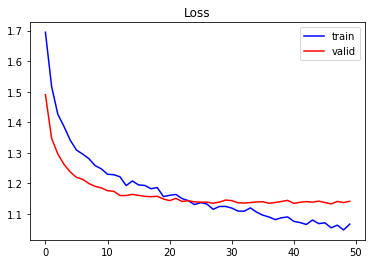

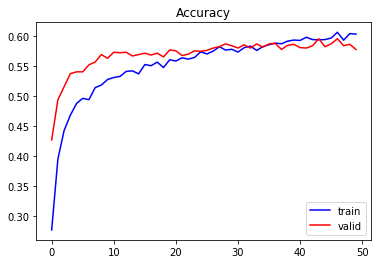

In [18]:
plt.plot(train_loss, 'b', label='train')
plt.plot(valid_loss, 'r', label='valid')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(train_acc, 'b', label='train')
plt.plot(valid_acc, 'r', label='valid')
plt.legend(loc=4)
plt.title("Accuracy")
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
y_predict = model.predict_classes(x_test)
y_test_label = np.argmax(y_test, axis=1)

In [21]:
print('Accuracy in testing data:', accuracy_score(y_test_label, y_predict))

Accuracy in testing data: 0.6047486033519553


In [22]:
tf.global_variables()

[<tf.Variable 'dense/kernel:0' shape=(310, 128) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(128, 64) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(64,) dtype=float32>,
 <tf.Variable 'dense_2/kernel:0' shape=(64, 6) dtype=float32>,
 <tf.Variable 'dense_2/bias:0' shape=(6,) dtype=float32>,
 <tf.Variable 'Adam/iter:0' shape=() dtype=int64>,
 <tf.Variable 'Adam/beta_1:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/beta_2:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/decay:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/dense/kernel/m:0' shape=(310, 128) dtype=float32>,
 <tf.Variable 'Adam/dense/bias/m:0' shape=(128,) dtype=float32>,
 <tf.Variable 'Adam/dense_1/kernel/m:0' shape=(128, 64) dtype=float32>,
 <tf.Variable 'Adam/dense_1/bias/m:0' shape=(64,) dtype=float32>,
 <tf.Variable 'Adam/dense_2/kernel/m:0' shape=(64, 6) dtype=float32>,
 <tf.Variabl

In [23]:
# save model
model.save('pokemon_model.h5')

# load model
another_model = tf.keras.models.load_model('pokemon_model.h5')

W0825 16:36:02.862246 20112 deprecation.py:506] From C:\Users\jovih\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0825 16:36:02.863243 20112 deprecation.py:506] From C:\Users\jovih\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
X_test = X_[ Y_.shape[0]: ]
X_test.shape

(1791, 310)

In [25]:
y_predict = another_model.predict_classes(X_test)

In [26]:
df_test=pd.read_csv('test.csv')
print(pd.DataFrame({'class': y_predict}, index=df_test.id).head())
pd.DataFrame({'class': y_predict}, index=df_test.id).to_csv('submission.csv')

                              class
id                                 
MTA5MTEwOTYxMzM0NzA2NDEzNzM=      2
MTY0OTUyMTM2MDExMjg3MjczMjU=      1
MTQ0ODU1OTEzOTU1NTAyNzI4NjE=      3
MTY1ODg1MzEwNzYzNDUzMDUwNTM=      3
MTY0NTg2OTA5MTkzOTE2MTc1MTc=      4
